In [1]:
%pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # viewing data
import numpy as np # calculation
import matplotlib.pyplot as plt # plotting graph
import seaborn as sns # to make data beautiful/aesthetic

from sklearn.preprocessing import LabelEncoder #Convert categorical features into numerical features
from sklearn.model_selection import train_test_split # training data
from sklearn.linear_model import LogisticRegression # bringing in a model
from sklearn.metrics import classification_report,accuracy_score # evaluate the model, quick result-accuracy score, in depth classification report
from sklearn.preprocessing import StandardScaler # Normalize the data
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [3]:
Lc = Lung_Cancer = pd.read_csv("Lung Cancer.csv")

In [4]:
Lc

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05/04/2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10/09/2017,0
1,2,50,Female,Netherlands,20/04/2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17/06/2024,1
2,3,65,Female,Hungary,05/04/2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09/04/2024,0
3,4,51,Female,Belgium,05/02/2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23/04/2017,0
4,5,37,Male,Luxembourg,29/11/2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08/01/2025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,01/07/2022,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,23/02/2023,0
889996,889997,62,Female,Cyprus,27/09/2015,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,19/06/2017,0
889997,889998,48,Female,Estonia,27/03/2016,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,23/01/2017,1
889998,889999,67,Female,Slovakia,22/12/2015,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,12/12/2017,0


In [5]:
Lc.shape

(890000, 17)

In [6]:
Lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [7]:
le = LabelEncoder().fit_transform
Lc["Gender_Encoded"] = LabelEncoder().fit_transform(Lc["gender"])

In [8]:
Lc["Country_Encoded"] = LabelEncoder().fit_transform(Lc["country"])

In [9]:
Lc

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,Gender_Encoded,Country_Encoded
0,1,64,Male,Sweden,05/04/2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10/09/2017,0,1,26
1,2,50,Female,Netherlands,20/04/2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17/06/2024,1,0,19
2,3,65,Female,Hungary,05/04/2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09/04/2024,0,0,12
3,4,51,Female,Belgium,05/02/2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23/04/2017,0,0,1
4,5,37,Male,Luxembourg,29/11/2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08/01/2025,0,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,01/07/2022,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,23/02/2023,0,1,18
889996,889997,62,Female,Cyprus,27/09/2015,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,19/06/2017,0,0,4
889997,889998,48,Female,Estonia,27/03/2016,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,23/01/2017,1,0,7
889998,889999,67,Female,Slovakia,22/12/2015,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,12/12/2017,0,0,23


In [10]:
Lc["Family_History_Encoded"]=LabelEncoder().fit_transform(Lc["family_history"])
Lc["Smoking_Status_Encoded"]=LabelEncoder().fit_transform(Lc["smoking_status"])
Lc["Treatment_Type_Encoded"]=LabelEncoder().fit_transform(Lc["treatment_type"])

In [11]:
Lc

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,Gender_Encoded,Country_Encoded,Family_History_Encoded,Smoking_Status_Encoded,Treatment_Type_Encoded
0,1,64,Male,Sweden,05/04/2016,Stage I,Yes,Passive Smoker,29.4,199,...,1,0,Chemotherapy,10/09/2017,0,1,26,1,3,0
1,2,50,Female,Netherlands,20/04/2023,Stage III,Yes,Passive Smoker,41.2,280,...,0,0,Surgery,17/06/2024,1,0,19,1,3,3
2,3,65,Female,Hungary,05/04/2023,Stage III,Yes,Former Smoker,44.0,268,...,0,0,Combined,09/04/2024,0,0,12,1,1,1
3,4,51,Female,Belgium,05/02/2016,Stage I,No,Passive Smoker,43.0,241,...,0,0,Chemotherapy,23/04/2017,0,0,1,0,3,0
4,5,37,Male,Luxembourg,29/11/2023,Stage I,No,Passive Smoker,19.7,178,...,0,0,Combined,08/01/2025,0,1,17,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,01/07/2022,Stage IV,No,Passive Smoker,44.8,243,...,1,0,Radiation,23/02/2023,0,1,18,0,3,2
889996,889997,62,Female,Cyprus,27/09/2015,Stage II,Yes,Former Smoker,21.6,240,...,0,0,Surgery,19/06/2017,0,0,4,1,1,3
889997,889998,48,Female,Estonia,27/03/2016,Stage III,Yes,Never Smoked,38.6,242,...,0,0,Combined,23/01/2017,1,0,7,1,2,1
889998,889999,67,Female,Slovakia,22/12/2015,Stage IV,Yes,Former Smoker,18.6,194,...,0,0,Chemotherapy,12/12/2017,0,0,23,1,1,0


In [12]:
#Mapping
csm = cancer_stage_mapping = {"Stage I":1, "Stage II":2, "Stage III":3,"Stage IV":4}
Lc["cancer_stage_mapped"] = Lc["cancer_stage"].map(csm)

In [13]:
Lc

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,other_cancer,treatment_type,end_treatment_date,survived,Gender_Encoded,Country_Encoded,Family_History_Encoded,Smoking_Status_Encoded,Treatment_Type_Encoded,cancer_stage_mapped
0,1,64,Male,Sweden,05/04/2016,Stage I,Yes,Passive Smoker,29.4,199,...,0,Chemotherapy,10/09/2017,0,1,26,1,3,0,1
1,2,50,Female,Netherlands,20/04/2023,Stage III,Yes,Passive Smoker,41.2,280,...,0,Surgery,17/06/2024,1,0,19,1,3,3,3
2,3,65,Female,Hungary,05/04/2023,Stage III,Yes,Former Smoker,44.0,268,...,0,Combined,09/04/2024,0,0,12,1,1,1,3
3,4,51,Female,Belgium,05/02/2016,Stage I,No,Passive Smoker,43.0,241,...,0,Chemotherapy,23/04/2017,0,0,1,0,3,0,1
4,5,37,Male,Luxembourg,29/11/2023,Stage I,No,Passive Smoker,19.7,178,...,0,Combined,08/01/2025,0,1,17,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,01/07/2022,Stage IV,No,Passive Smoker,44.8,243,...,0,Radiation,23/02/2023,0,1,18,0,3,2,4
889996,889997,62,Female,Cyprus,27/09/2015,Stage II,Yes,Former Smoker,21.6,240,...,0,Surgery,19/06/2017,0,0,4,1,1,3,2
889997,889998,48,Female,Estonia,27/03/2016,Stage III,Yes,Never Smoked,38.6,242,...,0,Combined,23/01/2017,1,0,7,1,2,1,3
889998,889999,67,Female,Slovakia,22/12/2015,Stage IV,Yes,Former Smoker,18.6,194,...,0,Chemotherapy,12/12/2017,0,0,23,1,1,0,4


In [14]:
#Converting date to days
Lc['diagnosis_date'] = pd.to_datetime(Lc['diagnosis_date'], format='%d/%m/%Y')
Lc['end_treatment_date'] = pd.to_datetime(Lc['end_treatment_date'], format='%d/%m/%Y')
Lc['Period_of_treatment'] = (Lc['end_treatment_date'] - Lc['diagnosis_date']).dt.days

In [15]:
Lc

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,treatment_type,end_treatment_date,survived,Gender_Encoded,Country_Encoded,Family_History_Encoded,Smoking_Status_Encoded,Treatment_Type_Encoded,cancer_stage_mapped,Period_of_treatment
0,1,64,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,...,Chemotherapy,2017-09-10,0,1,26,1,3,0,1,523
1,2,50,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,...,Surgery,2024-06-17,1,0,19,1,3,3,3,424
2,3,65,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,...,Combined,2024-04-09,0,0,12,1,1,1,3,370
3,4,51,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,...,Chemotherapy,2017-04-23,0,0,1,0,3,0,1,443
4,5,37,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,...,Combined,2025-01-08,0,1,17,0,3,1,1,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,...,Radiation,2023-02-23,0,1,18,0,3,2,4,237
889996,889997,62,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,...,Surgery,2017-06-19,0,0,4,1,1,3,2,631
889997,889998,48,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,...,Combined,2017-01-23,1,0,7,1,2,1,3,302
889998,889999,67,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,...,Chemotherapy,2017-12-12,0,0,23,1,1,0,4,721


In [16]:
#Correlation matrix
#It is a table showing correlation coefficients between pairs of variables
#Columns dropped, new dataset/table
cd = columns_to_drop = ["id", "gender","country","diagnosis_date", "cancer_stage", "family_history", "smoking_status", "treatment_type", "end_treatment_date"]
New_Lc = Lc.drop(columns=cd)
correlation_matrix=New_Lc.corr()

In [17]:
correlation_matrix

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,Gender_Encoded,Country_Encoded,Family_History_Encoded,Smoking_Status_Encoded,Treatment_Type_Encoded,cancer_stage_mapped,Period_of_treatment
age,1.000000,0.000915,0.001799,-0.001082,-0.000519,-0.000067,-0.000785,0.001233,-0.000945,-0.000309,-0.001111,-0.000045,-0.001028,0.000875,0.000246
bmi,0.000915,1.000000,0.746905,0.001923,0.001662,0.000608,0.000771,0.000007,0.000504,-0.000766,0.000411,0.000901,0.000783,-0.000446,-0.007400
cholesterol_level,0.001799,0.746905,1.000000,0.002049,0.001263,0.000467,-0.000185,0.000157,0.000224,-0.000483,0.000086,0.001169,0.000113,-0.000504,-0.008703
hypertension,-0.001082,0.001923,0.002049,1.000000,0.108201,0.097139,0.073651,0.000059,-0.000254,0.001479,-0.001639,0.000408,0.001566,0.000818,-0.010732
asthma,-0.000519,0.001662,0.001263,0.108201,1.000000,0.053147,0.039283,-0.001809,0.001142,-0.000521,-0.000808,-0.000140,0.000734,-0.001350,-0.002795
cirrhosis,-0.000067,0.000608,0.000467,0.097139,0.053147,1.000000,0.022671,0.001956,0.001092,-0.000690,0.002495,0.001454,0.001952,-0.000034,-0.001821
other_cancer,-0.000785,0.000771,-0.000185,0.073651,0.039283,0.022671,1.000000,-0.001972,-0.000545,0.002653,-0.000024,-0.000579,-0.001048,0.000260,-0.001021
survived,0.001233,0.000007,0.000157,0.000059,-0.001809,0.001956,-0.001972,1.000000,0.000762,0.000066,0.001322,0.000087,0.002354,0.002519,-0.000691
Gender_Encoded,-0.000945,0.000504,0.000224,-0.000254,0.001142,0.001092,-0.000545,0.000762,1.000000,0.001468,0.000762,-0.000595,0.000040,-0.000161,-0.000734
Country_Encoded,-0.000309,-0.000766,-0.000483,0.001479,-0.000521,-0.000690,0.002653,0.000066,0.001468,1.000000,-0.000624,0.001484,0.001365,-0.000665,-0.000350


In [18]:
New_Lc

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,Gender_Encoded,Country_Encoded,Family_History_Encoded,Smoking_Status_Encoded,Treatment_Type_Encoded,cancer_stage_mapped,Period_of_treatment
0,64,29.4,199,0,0,1,0,0,1,26,1,3,0,1,523
1,50,41.2,280,1,1,0,0,1,0,19,1,3,3,3,424
2,65,44.0,268,1,1,0,0,0,0,12,1,1,1,3,370
3,51,43.0,241,1,1,0,0,0,0,1,0,3,0,1,443
4,37,19.7,178,0,0,0,0,0,1,17,0,3,1,1,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40,44.8,243,1,1,1,0,0,1,18,0,3,2,4,237
889996,62,21.6,240,0,0,0,0,0,0,4,1,1,3,2,631
889997,48,38.6,242,1,0,0,0,1,0,7,1,2,1,3,302
889998,67,18.6,194,1,1,0,0,0,0,23,1,1,0,4,721


<Axes: >

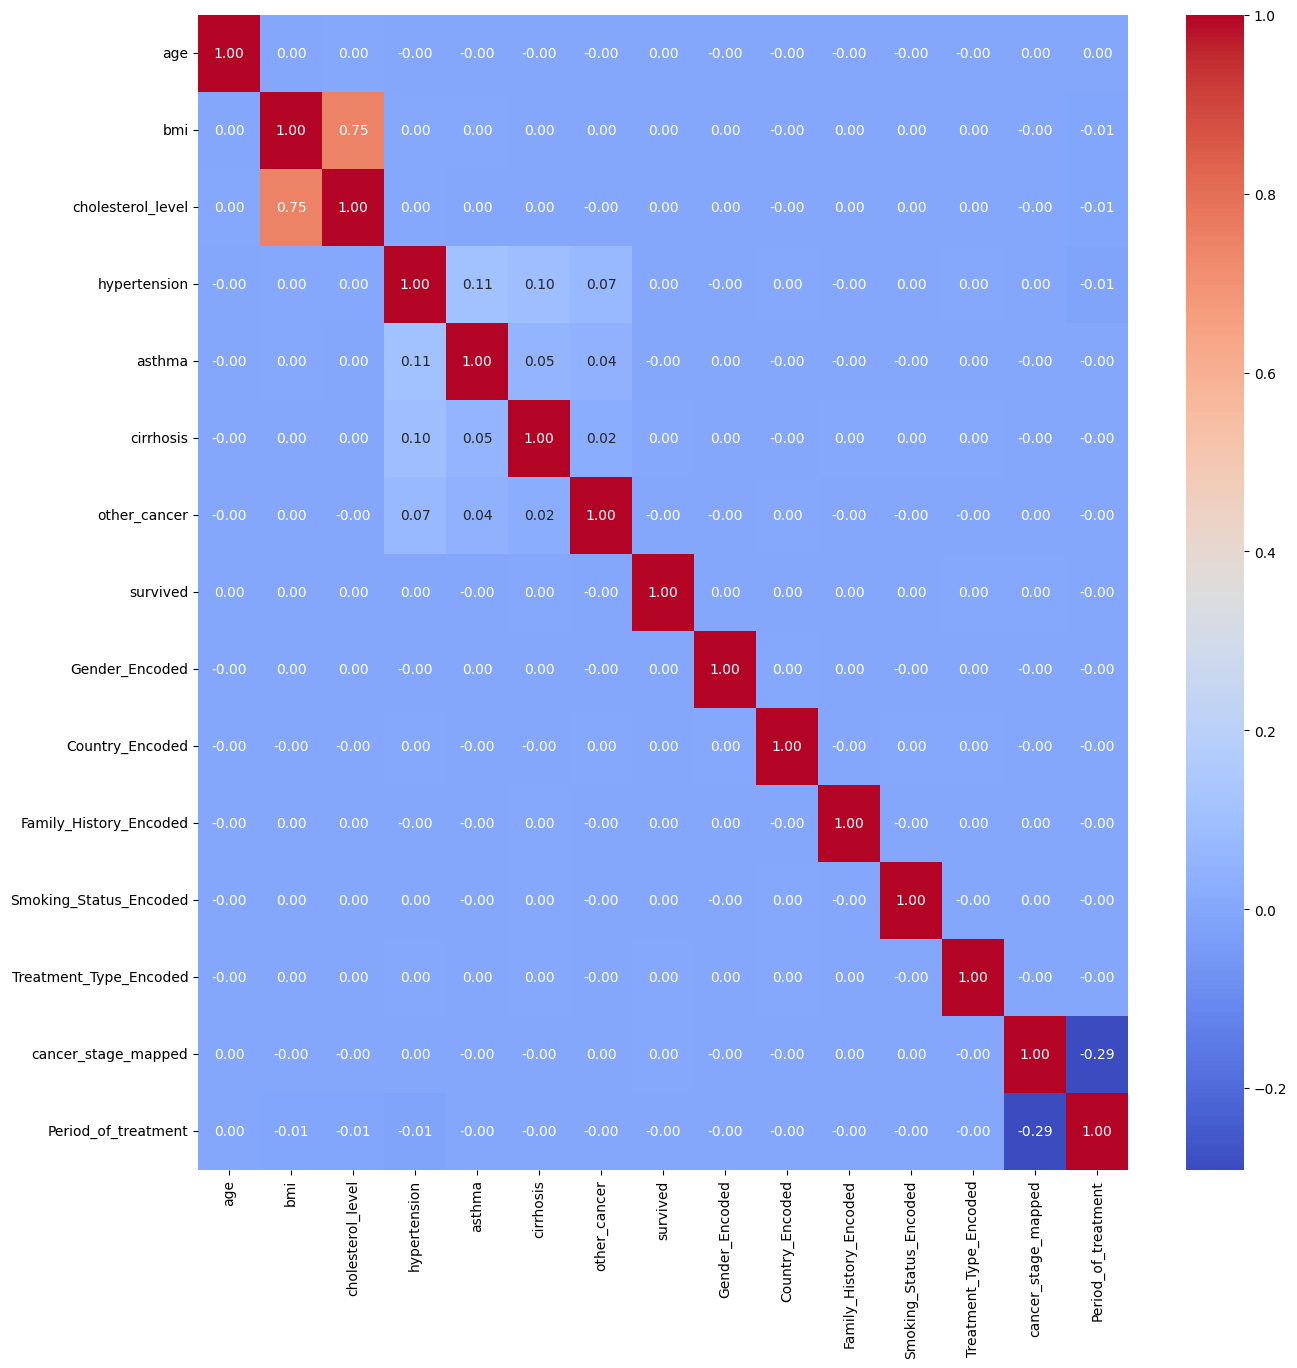

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,cmap="coolwarm",annot = True, fmt=".2f")
#annot=True gives numbers, fmt decimal places, cmap gives the color of the chat

<Axes: >

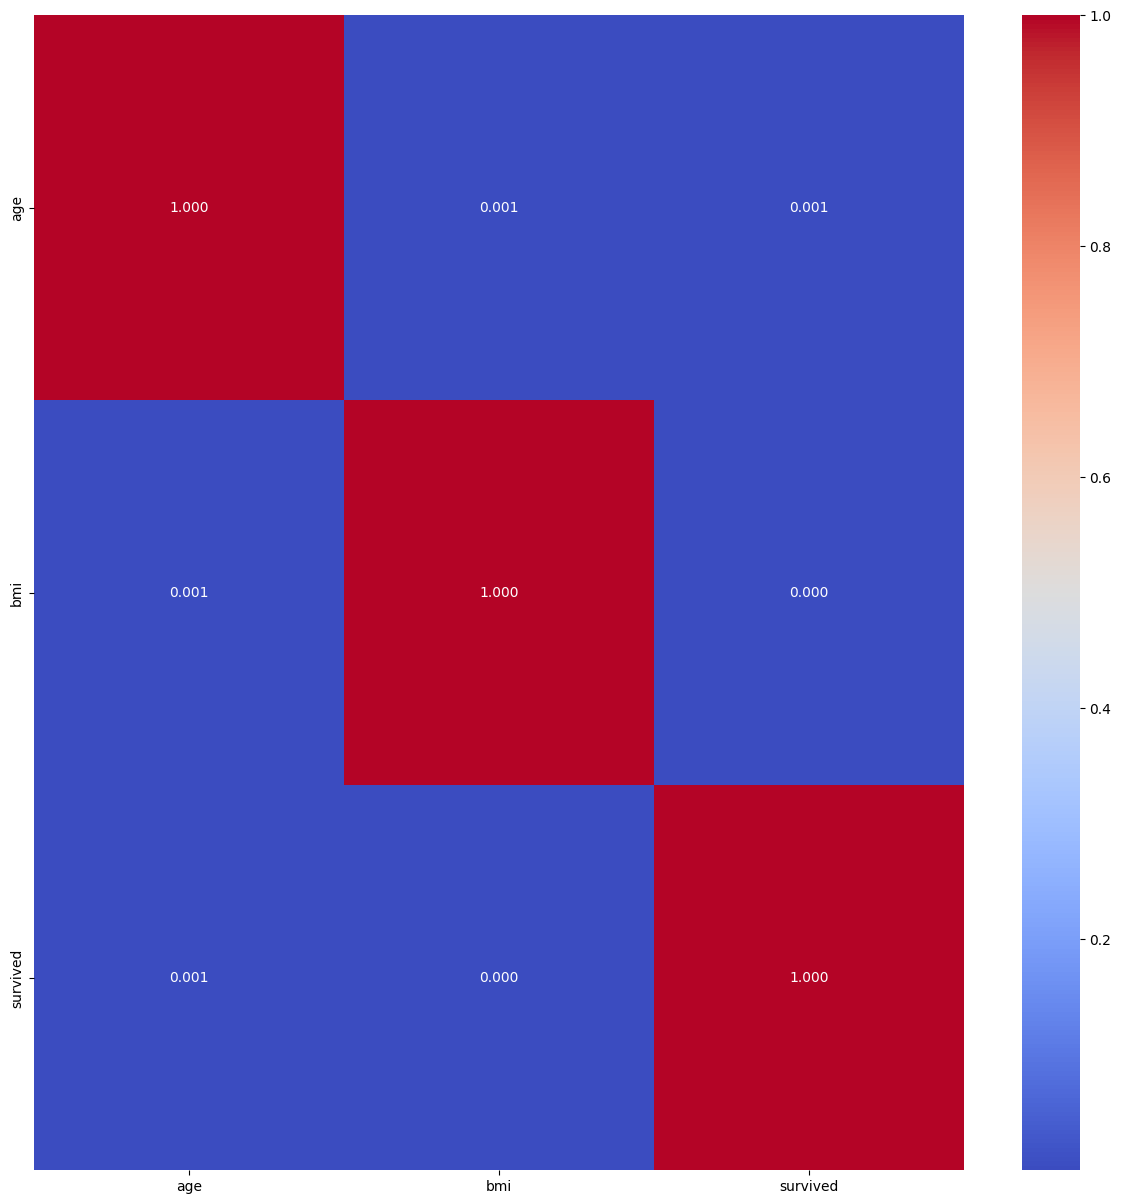

In [20]:
values = ["age", "bmi","survived"]
cm = Lc[values].corr(method = "pearson")
plt.figure(figsize =(15,15))
sns.heatmap(cm,cmap="coolwarm",annot = True, fmt=".3f")


In [21]:
#Splitting Data
#1. Split this dataset into 2 (80% training, 20% testing)

#2. Pick a model and train it

#3.Evaluate our model(classification report)

In [22]:
#age, gender,cancer_stage,smoking_status,treatment_type - x
#y-survived

In [23]:
features = ["age", "Gender_Encoded", "cancer_stage_mapped", "Smoking_Status_Encoded","Treatment_Type_Encoded", "other_cancer","cirrhosis", "bmi"]
output = ["survived"]

In [24]:
X = Lc[features]
y =Lc[output]

In [25]:
X_train, X_test,y_train, y_test =train_test_split(X,y,test_size = 0.2,random_state = 42, stratify = y)

In [26]:
#Github
#git add .
#git commit -m "any comment"
#git push origin main


In [27]:
#STANDARDIZATION
# Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
#SMOTE
smote = SMOTE(random_state = 42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [29]:
#DEFINE A MODEL
#Start with Logistic Regression

model = LogisticRegression(max_iter=1000, class_weight = "balanced")
model.fit(X_train,y_train)

c:\Users\focha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [30]:
#evaluate
y_pred = model.predict(X_test)

In [31]:
#print accuracy score
print("accuracy_score:")

print(accuracy_score(y_test,y_pred))

accuracy_score:
0.49524157303370786


In [32]:
#print classification report
#Precision: How many people you predicted to survive Lung cancer actually survived?
#(You predicted 78% of people who survived Lung cancer)

#Recall: How many actual cancer patients did you capture that survived from the real data set

#Support: Is the test data size

print("classification report:")

print(classification_report(y_test,y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.78      0.49      0.60    138799
           1       0.22      0.51      0.31     39201

    accuracy                           0.50    178000
   macro avg       0.50      0.50      0.46    178000
weighted avg       0.66      0.50      0.54    178000



In [33]:
#RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, class_weight ="balanced", random_state = 42)

model_rfc.fit(X_train_resampled,y_train_resampled)

c:\Users\focha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
y_pred_rfc = model_rfc.predict(X_test)

In [35]:
print("accuracy_score:")
print(accuracy_score(y_test,y_pred_rfc))

accuracy_score:
0.6450505617977528


In [36]:
print("classification report:")

print(classification_report(y_test,y_pred_rfc))

classification report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    138799
           1       0.22      0.24      0.23     39201

    accuracy                           0.65    178000
   macro avg       0.50      0.50      0.50    178000
weighted avg       0.66      0.65      0.65    178000



In [37]:
#MODEL 2

model_2 = LogisticRegression(max_iter=1000, class_weight = "balanced")
model_2.fit(X_train_resampled,y_train_resampled)

c:\Users\focha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
#evaluate
y_pred_2 = model_2.predict(X_test)

In [39]:
#print classification report
print("accuracy_score:")

print(accuracy_score(y_test,y_pred_2))

accuracy_score:
0.4917247191011236


In [40]:
print("classification report:")

print(classification_report(y_test,y_pred_2))

classification report:
              precision    recall  f1-score   support

           0       0.78      0.48      0.60    138799
           1       0.22      0.52      0.31     39201

    accuracy                           0.49    178000
   macro avg       0.50      0.50      0.45    178000
weighted avg       0.66      0.49      0.53    178000



In [ ]:
Lc.to_csv("clean_Lung_Cancer.csv", index = False) #To push your dataframe to csv, use .to_csv.